In [1]:
import sys 
sys.path.append('..')
import alpenglow.files as af
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.external.tifffile as tiff
from skimage import transform
import numpy as np
import shutil as sh
import os
import boto3
from scipy import optimize
import alpenglow.stitching
from imp import reload
reload(alpenglow.stitching)
reload(alpenglow.files)
from alpenglow.stitching import stitch, find_shift, apply_shift

In [2]:
from skimage.feature import register_translation
from skimage import img_as_float
from skimage import exposure
from skimage.io import imread_collection, ImageCollection
from skimage.external.tifffile import imread
import skimage.external.tifffile as tif
import skimage
import dask.array as da
from dask import delayed

In [3]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('alpenglowoptics')
ll = list(bucket.objects.all())

In [4]:
import numpy as np
import os
import boto3


def download_s3(remote_fname, local_fname, bucket_name="alpenglowoptics"):
    """
    Download a file from S3 to our local file-system
    """
    if not os.path.exists(local_fname):
        s3 = boto3.resource('s3')
        b = s3.Bucket(bucket_name)
        b.download_file(remote_fname, local_fname)  

In [5]:
for x in range(4, 32):
        fname = "im_%06d_000055.tif" % x 
        download_s3('76AO/Strips/' + fname, '../data/AO/' + fname)    


In [34]:
image1 = tif.imread('../data/AO/im_000005_000055.tif')
image2 = tif.imread('../data/AO/im_000006_000055.tif')
mosaic, shift = stitch(image1, image2) #stitching 5 with 6 to produce mosaic

../alpenglow/stitching.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered = np.zeros((rows1 + rows2 - overlap, cols1), dtype=int)
../alpenglow/stitching.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered[rows2-margin:, abs(shift[1]):] = image1[overlap-margin:, :shift[1]]
../alpenglow/stitching.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fade1[:, abs(shift[1]):] = image1[overlap-margin:overlap, :shift[1]] * np.arange(0, 1, 0.01)[:, np.newaxis]


In [35]:
for x in range (7, 32):
    image2 = tif.imread('../data/AO/im_%06d_000055.tif' % x)
    mosaic, shift = stitch(mosaic, image2)

../alpenglow/stitching.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered = np.zeros((rows1 + rows2 - overlap, cols1), dtype=int)
../alpenglow/stitching.py:74: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered[rows2-margin:, :cols1-shift[1]] = image1[overlap-margin:, shift[1]:]
../alpenglow/stitching.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fade1[:, :cols1-shift[1]] = image1[overlap-margin:overlap, shift[1]:] * np.arange(0, 1, 0.01)[:, np.newaxis]
../alpenglow/stitching.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  registered[rows2-margin:, abs(shift[1]):] = image1[overlap-margin:, :shift[1]]
../alpenglow/stitching.py:84: VisibleDeprecationWarning: using a non-integer numb

MemoryError: 

In [36]:
mosaic.dtype

dtype('int64')

In [37]:
mosaic = mosaic.astype('int16')

In [38]:
mosaic.dtype

dtype('int16')

In [39]:
mosaic.shape

(12724, 23872)

In [40]:
tif.imsave('../data/AO/mosaic_000055_raw.tif', mosaic)

In [41]:
# Upload /tmp/myfile to s3://bucket/key
from boto3.s3.transfer import S3Transfer
client = boto3.client('s3', 'us-west-2')
transfer = S3Transfer(client)
transfer.upload_file('../data/AO/mosaic_000055_raw.tif', 'alpenglowoptics', '76AO_mosaic_raw')

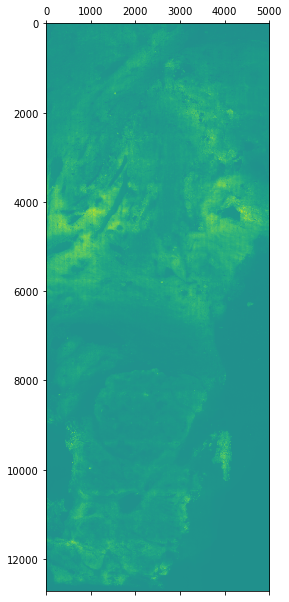

In [42]:
plt.matshow(mosaic[:, 15000:20000])

In [43]:
mosaic_adapteq = exposure.equalize_adapthist(mosaic, clip_limit=0.01)

/opt/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:106: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint16.
  "%s to positive image of type %s." % (dtypeobj_in, dtypeobj))
/opt/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from int16 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


MemoryError: 

dtype('int64')

dtype('int16')